In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
usedcars_df = pd.read_csv("used_cars.csv")
usedcars_df

model_year          brand                                      model  \
0            2016         Toyota                          Land Cruiser Base   
1            2014            RAM        ProMaster 2500 Window Van High Roof   
2            2002           Ford                                 Mustang GT   
3            2012            BMW                    428 Gran Coupe i xDrive   
4            2008  Mercedes-Benz                    SL-Class SL500 Roadster   
...           ...            ...                                        ...   
28138        2017        Bentley                           Huracan LP580-2S   
28139        2001          Mazda                                 RX-8 Sport   
28140        2018           Ford                              Model X P100D   
28141        2022           Land  Rover Range Rover Velar P380 SE R-Dynamic   
28142        2020           Audi                           A7 3.0T Prestige   

              type  miles_per_gallon  premium_version      msrp  \
0              SUV              13.0                1   84900.0   
1              Van              15.0                0   35000.0   
2            Coupe              16.0                0   26250.0   
3            Sedan              27.0                1   45000.0   
4      Convertible              18.0                1  100000.0   
...            ...               ...              ...       ...   
28138        Coupe              21.0                1  200000.0   
28139        Coupe              18.0                0   25000.0   
28140          SUV              94.0                1  199000.0   
28141          SUV              20.0                1   63700.0   
28142        Sedan              22.0                1   83500.0   

       collection_car  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1  
...               ...  
28138               1  
28139               0  
28140               1  
28141               0  
28142               0  

[28143 rows x 8 columns]

## Understand data

model_year: The year the vehicle

brand: The manufacturer of the vehicle

model: The specific model of the vehicle

type: The classification of the vehicle

miles_per_gallon: The fuel efficiency of the vehicle

premium_version: A binary field indicating whether the car is a premium version

msrp: The Manufacturer's Suggested Retail Price

collection_car: A binary field indicating whether the car is considered a "collector's item"

In [3]:
usedcars_df.isnull().sum()

model_year           0
brand                0
model                0
type                 0
miles_per_gallon    17
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [4]:
# drop null values in miles_per_gallon

usedcars_df.dropna(subset=['miles_per_gallon'], inplace=True)
usedcars_df

model_year          brand                                      model  \
0            2016         Toyota                          Land Cruiser Base   
1            2014            RAM        ProMaster 2500 Window Van High Roof   
2            2002           Ford                                 Mustang GT   
3            2012            BMW                    428 Gran Coupe i xDrive   
4            2008  Mercedes-Benz                    SL-Class SL500 Roadster   
...           ...            ...                                        ...   
28138        2017        Bentley                           Huracan LP580-2S   
28139        2001          Mazda                                 RX-8 Sport   
28140        2018           Ford                              Model X P100D   
28141        2022           Land  Rover Range Rover Velar P380 SE R-Dynamic   
28142        2020           Audi                           A7 3.0T Prestige   

              type  miles_per_gallon  premium_version      msrp  \
0              SUV              13.0                1   84900.0   
1              Van              15.0                0   35000.0   
2            Coupe              16.0                0   26250.0   
3            Sedan              27.0                1   45000.0   
4      Convertible              18.0                1  100000.0   
...            ...               ...              ...       ...   
28138        Coupe              21.0                1  200000.0   
28139        Coupe              18.0                0   25000.0   
28140          SUV              94.0                1  199000.0   
28141          SUV              20.0                1   63700.0   
28142        Sedan              22.0                1   83500.0   

       collection_car  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1  
...               ...  
28138               1  
28139               0  
28140               1  
28141               0  
28142               0  

[28126 rows x 8 columns]

In [5]:
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28126 entries, 0 to 28142
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_year        28126 non-null  int64  
 1   brand             28126 non-null  object 
 2   model             28126 non-null  object 
 3   type              28126 non-null  object 
 4   miles_per_gallon  28126 non-null  float64
 5   premium_version   28126 non-null  int64  
 6   msrp              28126 non-null  float64
 7   collection_car    28126 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [38]:
usedcars_df.describe()

model_year  miles_per_gallon  premium_version          msrp  \
count  28126.000000      28126.000000     28126.000000  2.812600e+04   
mean    2013.457833         21.769242         0.533777  5.736535e+04   
std        6.848438         13.472177         0.498867  6.146327e+04   
min     1974.000000         -1.000000         0.000000  0.000000e+00   
25%     2009.000000         17.000000         0.000000  3.000000e+04   
50%     2015.000000         20.000000         1.000000  4.120000e+04   
75%     2019.000000         24.000000         1.000000  6.400000e+04   
max     2024.000000        234.000000         1.000000  2.500000e+06   

       collection_car  
count    28126.000000  
mean         0.137382  
std          0.344256  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

In [6]:
#drop rows under condition
index_miles = usedcars_df[ (usedcars_df['miles_per_gallon'] == -1.0) ].index
usedcars_df.drop(index_miles , inplace=True)

In [40]:
usedcars_df.describe()

model_year  miles_per_gallon  premium_version          msrp  \
count  28125.000000      28125.000000     28125.000000  2.812500e+04   
mean    2013.457849         21.770052         0.533796  5.736739e+04   
std        6.848559         13.471733         0.498865  6.146341e+04   
min     1974.000000          0.000000         0.000000  0.000000e+00   
25%     2009.000000         17.000000         0.000000  3.000000e+04   
50%     2015.000000         20.000000         1.000000  4.120000e+04   
75%     2019.000000         24.000000         1.000000  6.400000e+04   
max     2024.000000        234.000000         1.000000  2.500000e+06   

       collection_car  
count    28125.000000  
mean         0.137387  
std          0.344261  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

In [7]:
cat_cols = usedcars_df.select_dtypes(include='O').columns
for col in cat_cols:
    print(f"no of unique values in {col} is : {usedcars_df[col].nunique()}")
    print(f"unique values in {col} is : {usedcars_df[col].unique()}")
    print()
    print("*" * 50)
    print()



no of unique values in brand is : 57
unique values in brand is : ['Toyota' 'RAM' 'Ford' 'BMW' 'Mercedes-Benz' 'Lexus' 'Chevrolet' 'Audi'
 'Porsche' 'Genesis' 'Hummer' 'Mazda' 'Land' 'Honda' 'Jeep' 'Jaguar'
 'Lincoln' 'Nissan' 'Saturn' 'Cadillac' 'Kia' 'Maserati' 'Volkswagen'
 'Dodge' 'Subaru' 'Chrysler' 'Hyundai' 'Mitsubishi' 'INFINITI' 'Tesla'
 'Lamborghini' 'GMC' 'MINI' 'Acura' 'Buick' 'Rivian' 'Pontiac' 'Alfa'
 'Mercury' 'Volvo' 'Rolls-Royce' 'McLaren' 'Bentley' 'Aston' 'FIAT'
 'Scion' 'Ferrari' 'Lucid' 'Saab' 'Maybach' 'Karma' 'Suzuki' 'Lotus'
 'Bugatti' 'Plymouth' 'smart' 'Polestar']

**************************************************

no of unique values in model is : 1898
unique values in model is : ['Land Cruiser Base' 'ProMaster 2500 Window Van High Roof' 'Mustang GT'
 ... 'V60 T6 R-Design Platinum' 'X5 xDrive 35i Sport Activity' 'X5 3.0i']

**************************************************

no of unique values in type is : 9
unique values in type is : ['SUV' 'Van' 'Coupe' 'S

## univariant analysis

In [8]:
import plotly.figure_factory as ff

In [43]:
num_cols = usedcars_df.select_dtypes(include='number').columns
for col in num_cols:
    print(f"Univarite for Column {col}")
    fig_1 = px.histogram(usedcars_df, x=col)
    fig_1.show()
    data = list(usedcars_df[col])
    fig_2 = ff.create_distplot([data], [f'distrubtion of {col}'], show_hist=False, show_rug=False, show_curve=True)
    fig_2.show()
    fig_3 = px.box(usedcars_df, x=col)
    fig_3.show()

Univarite for Column model_year


Univarite for Column miles_per_gallon


Univarite for Column premium_version


Univarite for Column msrp


Univarite for Column collection_car


In [44]:
cat_cols = usedcars_df.select_dtypes(include='O').columns
for col in cat_cols:
    if usedcars_df[col].nunique() < 10:
        # pie chart
        dff = usedcars_df.groupby(col)[['collection_car']].count().sort_values(by='collection_car', ascending=False).reset_index()
        fig = px.pie(names=dff[col], values=dff['collection_car'], title=f'Distrbution of {col}')
        # fig.update_layout(legend={'title':"product type", x=1, y=1})
        fig.show()
    elif usedcars_df[col].nunique() < 50:
        # countplot
        fig = px.histogram(usedcars_df, y=col, title=f'Distrbution of {col}')
        fig.show()
    else:
        # top 10
        dff = usedcars_df.groupby(col)[['collection_car']].count().reset_index().sort_values(by='collection_car', ascending=False).rename(columns={'collection_car':'count'}).head(10)
        # dff = dff.sort_values(by='age', ascending=True)
        fig = px.histogram(dff, y=col, x='count', title=f'Distrbution of {col}')
        fig.show()

In [33]:
dff = usedcars_df.groupby('type')[['collection_car']].count().reset_index().sort_values(by='collection_car').rename(columns={'collection_car':'count'}).reset_index() 
px.histogram(dff, y='type', x='count', title='Distrbution of type')



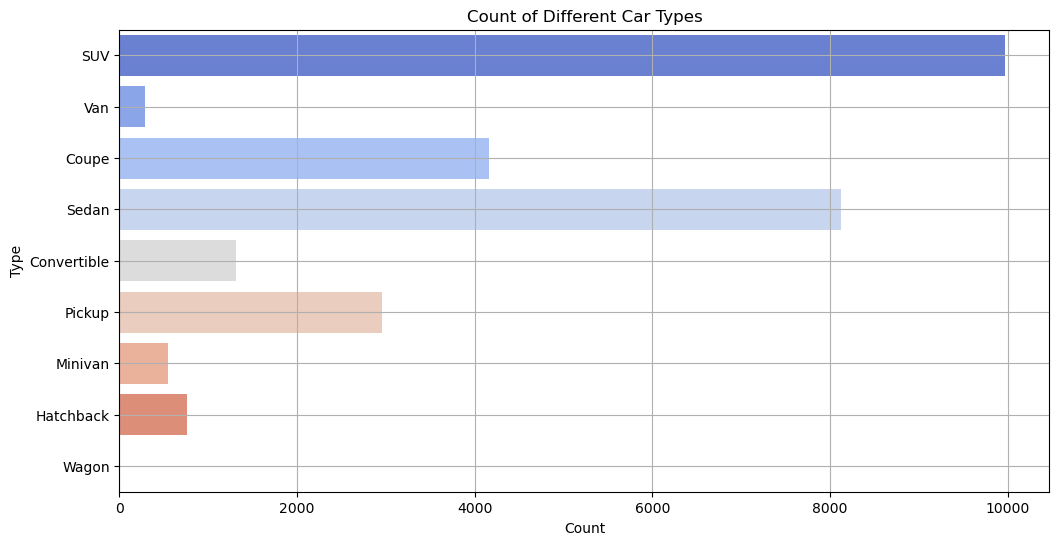

In [45]:
# Count of different car types
plt.figure(figsize=(12, 6))
sns.countplot(y='type', data=usedcars_df,palette="coolwarm")
plt.title('Count of Different Car Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.grid(True)
plt.show()

comment on numeric features:
==============================
model_year:
range(1974, 2024) most of values (2008, 2019)
distrbution is left skewed
there are outliers before lower boundary
****************************************************
miles_per_gallon:
range(0, 234) most of values (17, 24)
distrbution is right skewed
there are outliers after higher boundary
****************************************************
premium_version:
range(0, 1) most of values (1)
distrbution is uniform
no outliers 
****************************************************
msrp:
range(0, 2.5m) most of values (3m, 6.4m)
distrbution is right skewed
there are outliers after higher boundary
****************************************************
collection_car:
range(0, 1) most of values (0)
distrbution is uniform
no outliers 
comment on categorical features:
=================================
brand:
Ford is the most brand in used cars data
model:
M3 Base is the most model in used cars data
type:
SUV is the most type in used cars data

## Bi variant analysis

In [46]:
#sns.heatmap(usedcars_df.corr((numeric_only=True)), annot=True)
dff = usedcars_df[["model_year","miles_per_gallon","premium_version","msrp"	,"collection_car"]]
px.imshow(dff.corr(), text_auto=True, aspect=True)

<Axes: >

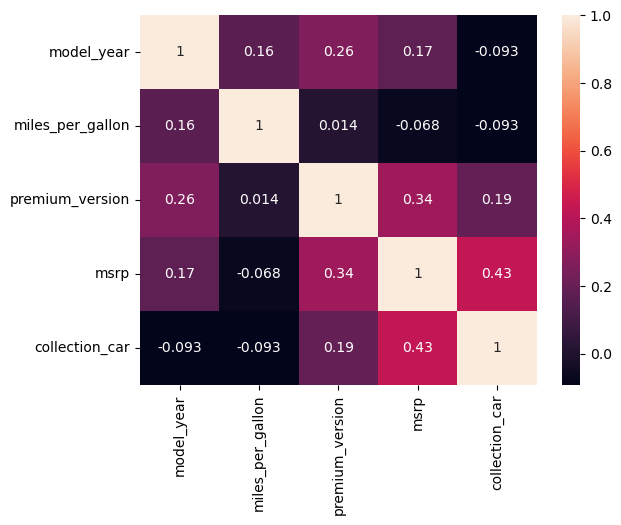

In [47]:
sns.heatmap(usedcars_df.corr(numeric_only=True), annot=True)

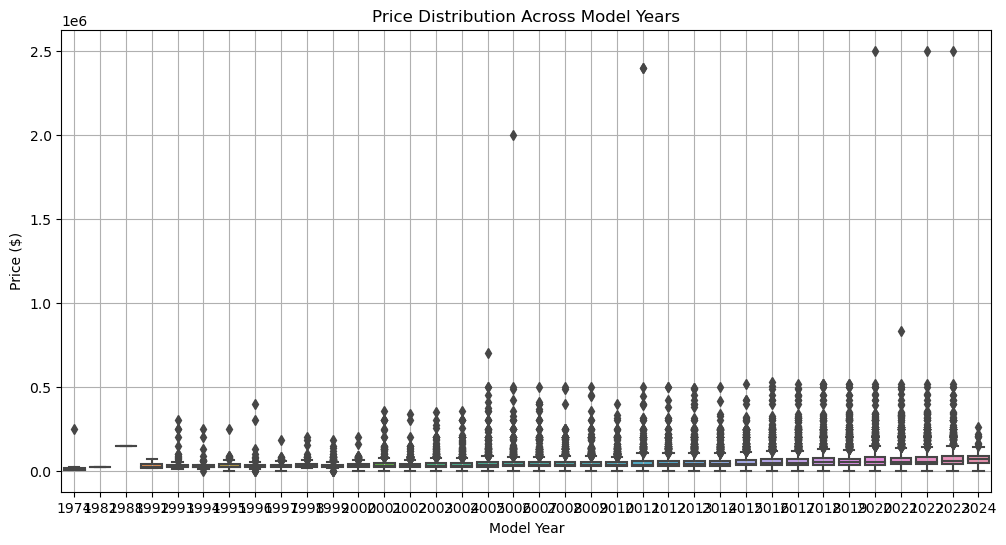

In [48]:
# Price over the years
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_year', y='msrp', data=usedcars_df)
plt.title('Price Distribution Across Model Years')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

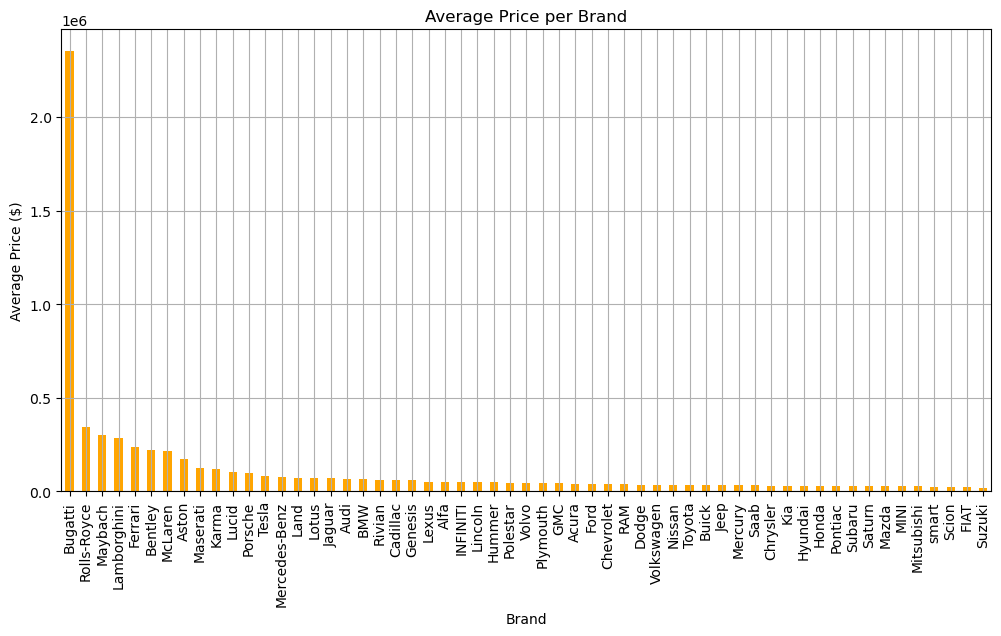

In [49]:
# Price over the brand(Bar plot for average price per brand) 
plt.figure(figsize=(12, 6))
usedcars_df.groupby('brand')['msrp'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Price per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

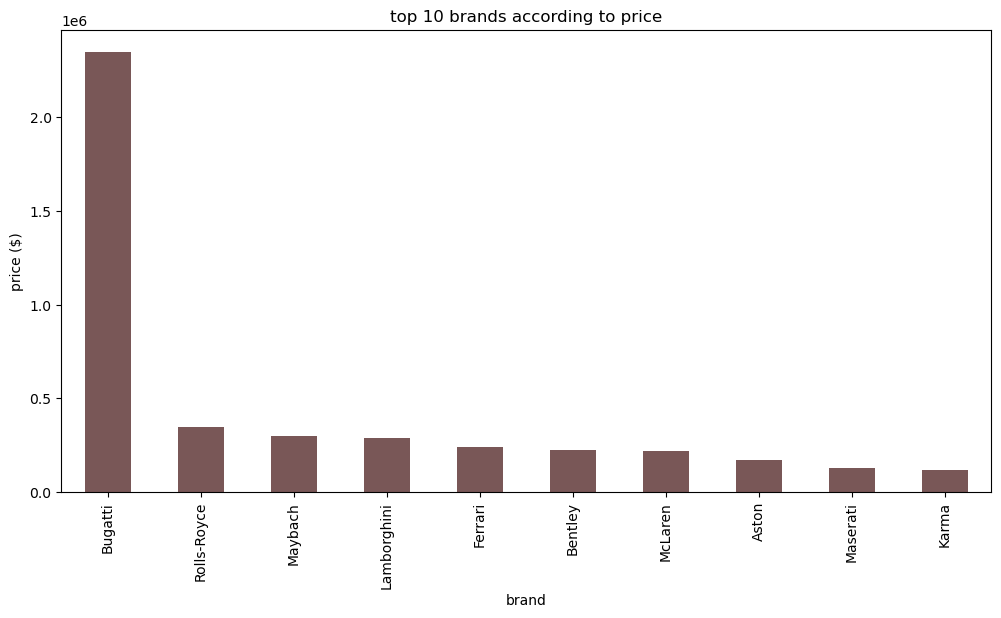

In [33]:
#top 10 brands according to price
plt.figure(figsize=(12, 6))
#usedcars_df.groupby('brand')['msrp'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
usedcars_df.groupby('brand')['msrp'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='#795757')
plt.title('top 10 brands according to price')
plt.xlabel('brand')
plt.ylabel('price ($)')
#plt.legend('type')
plt.show()

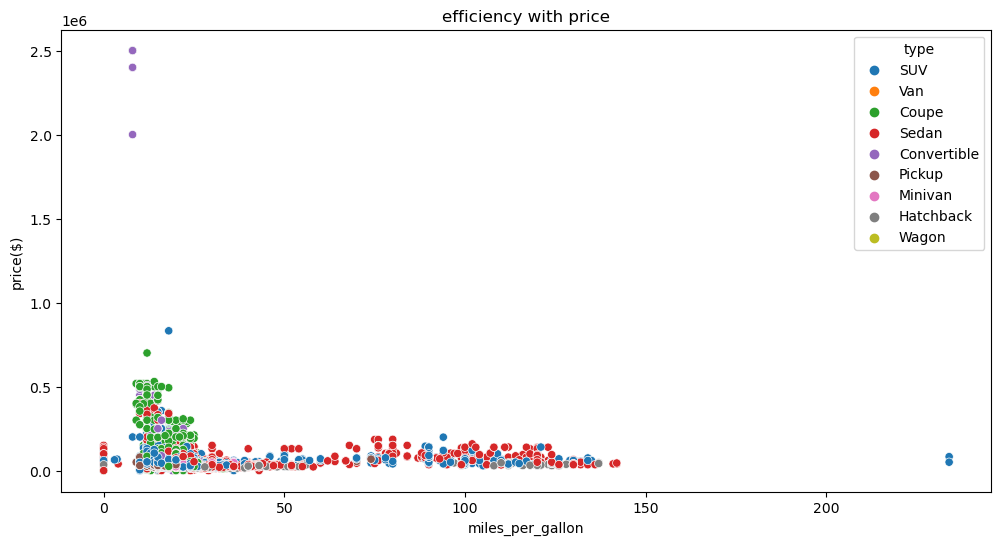

In [50]:
# scatterplot for efficiency ,price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=usedcars_df,x="miles_per_gallon",y="msrp",hue="type")
plt.title("efficiency with price")
plt.xlabel('miles_per_gallon')
plt.ylabel('price($)')
plt.show()

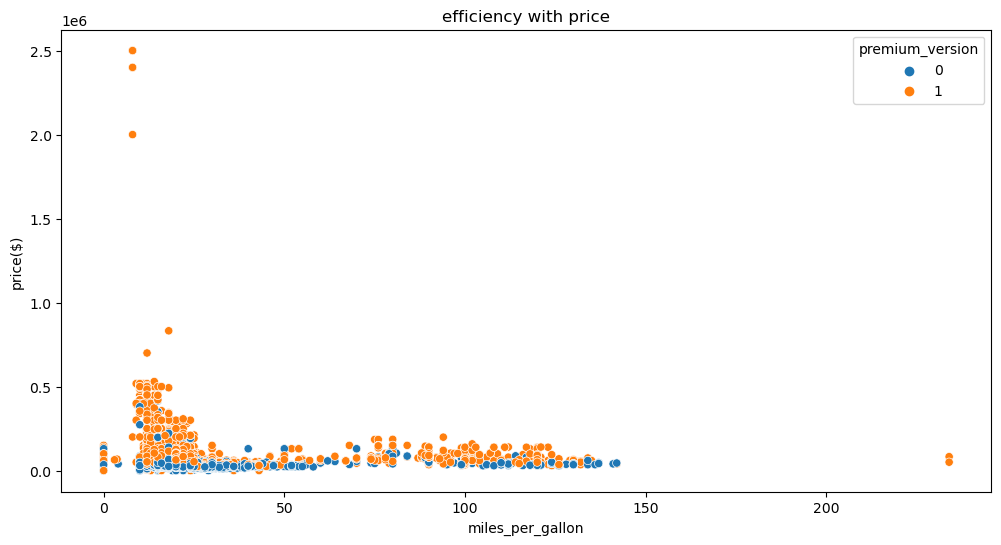

In [51]:
# scatterplot for efficiency ,price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=usedcars_df,x="miles_per_gallon",y="msrp",hue="premium_version")
plt.title("efficiency with price")
plt.xlabel('miles_per_gallon')
plt.ylabel('price($)')
plt.show()

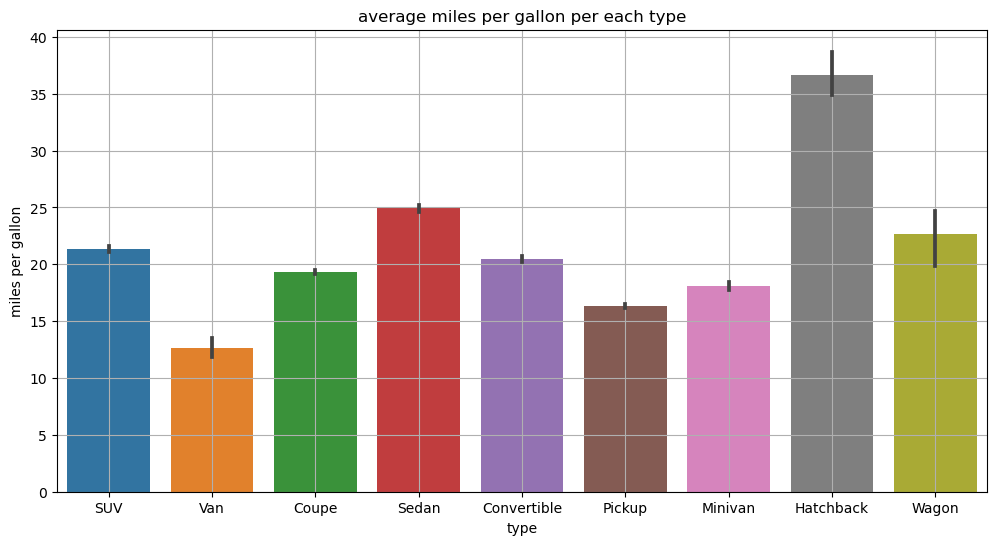

In [35]:
# efficiency / type

plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='miles_per_gallon', data=usedcars_df)
plt.title('average miles per gallon per each type')
plt.xlabel('type')
plt.ylabel('miles per gallon')
plt.grid(True)
plt.show()


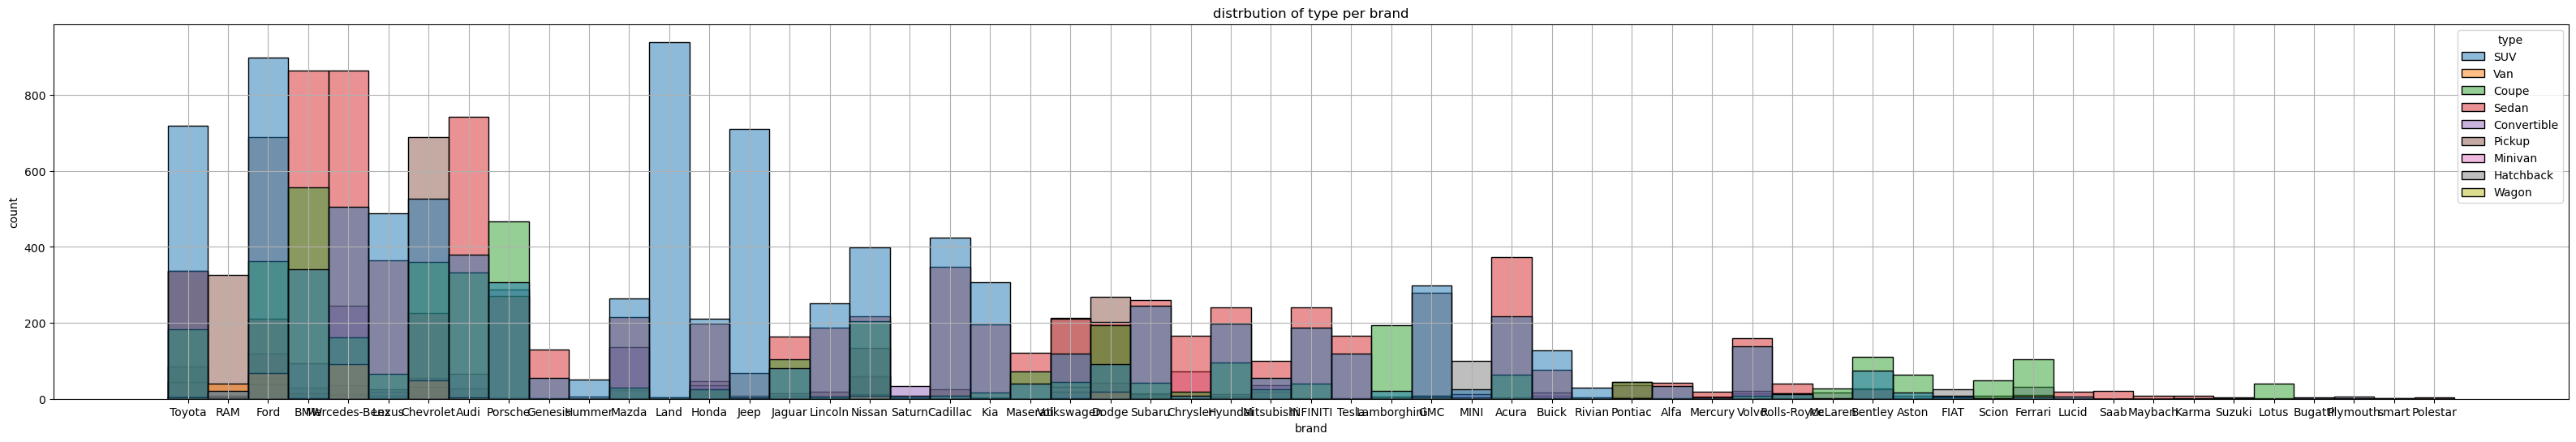

In [37]:
plt.figure(figsize=(40, 6))
sns.histplot(data=usedcars_df,x=usedcars_df['brand'],hue=usedcars_df['type'])
plt.xlabel("brand")
plt.ylabel("count")
plt.title("distrbution of type per brand")
plt.grid()

In [53]:
px.histogram(usedcars_df, x='type', color='premium_version',title='Distribution of premuim_version per type')

In [54]:
dff = usedcars_df.groupby('brand')['msrp'].mean().sort_values(ascending=False).reset_index().head(10)
dff_top =list(dff['brand'])
df_top_brands = usedcars_df[usedcars_df['brand'].isin(dff_top)]
px.histogram(df_top_brands, x='brand', color='type',title='Distribution of type per 10 top brands',color_discrete_sequence=px.colors.qualitative.G10)


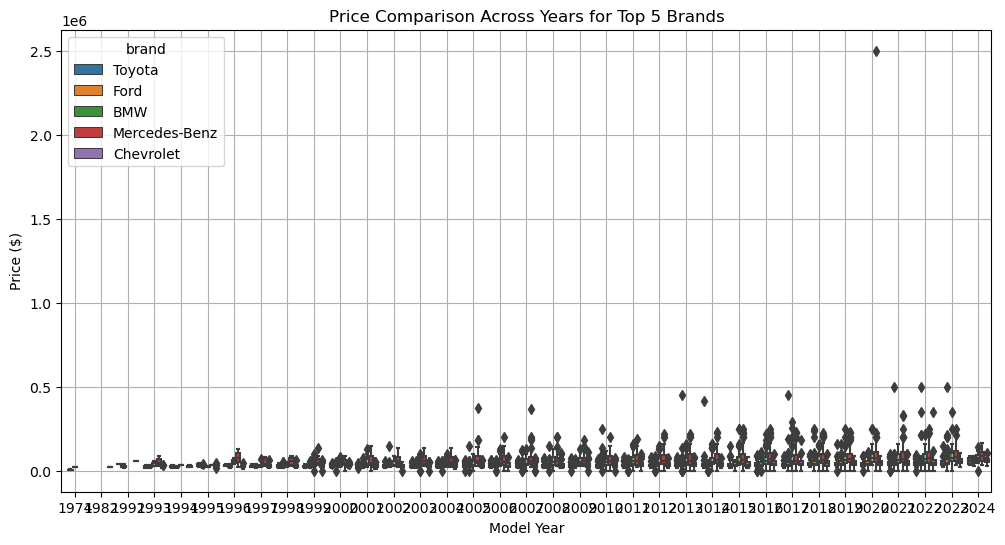

In [55]:
# Price comparison for each year for top brands
top_brands_list = usedcars_df['brand'].value_counts().head(5).index
df_top_brands = usedcars_df[usedcars_df['brand'].isin(top_brands_list)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_year', y='msrp', hue='brand', data=df_top_brands)
plt.title('Price Comparison Across Years for Top 5 Brands')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

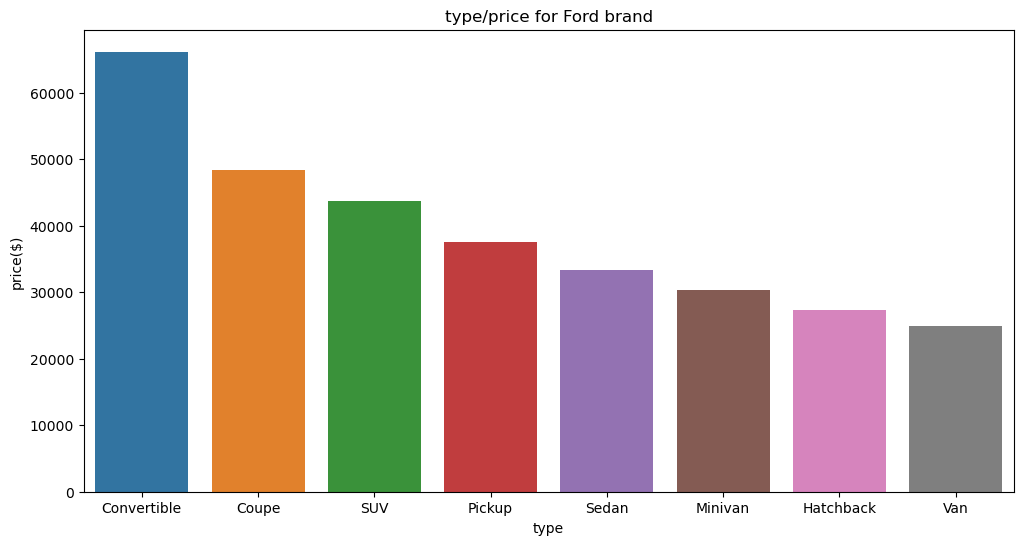

In [60]:

plt.figure(figsize=(12, 6))
df_ford = usedcars_df[ (usedcars_df['brand'] == 'Ford') ]
dff = df_ford.groupby('type')['msrp'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=dff , x='type' ,y='msrp')

plt.title("type/price for Ford brand")
plt.xlabel('type')
plt.ylabel('price($)')
plt.show()


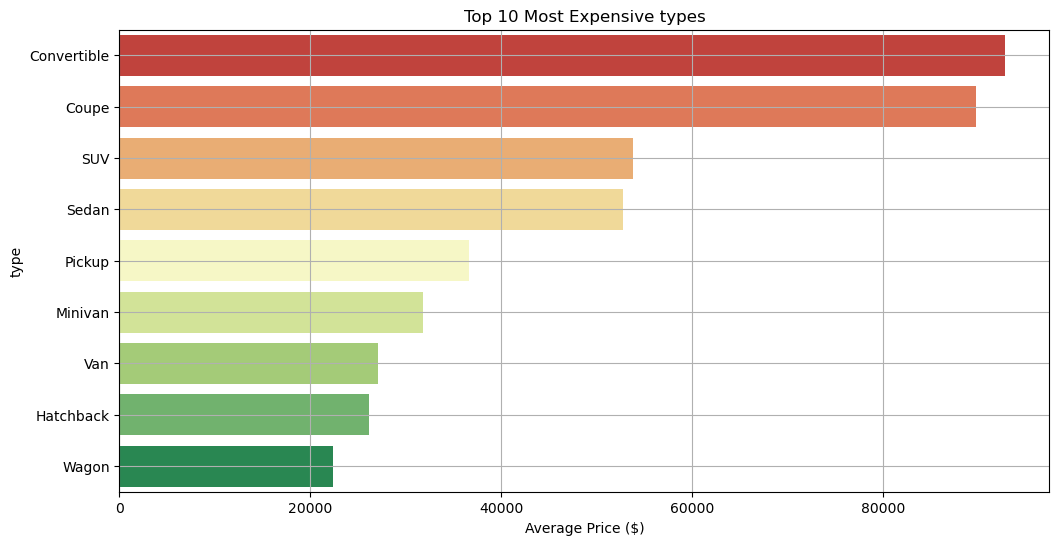

In [56]:
# top 10 types according to price
top_types = usedcars_df.groupby('type')['msrp'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_types.values, y=top_types.index, palette='RdYlGn')
plt.title('Top 10 Most Expensive types')
plt.xlabel('Average Price ($)')
plt.ylabel('type')
plt.grid(True)
plt.show()

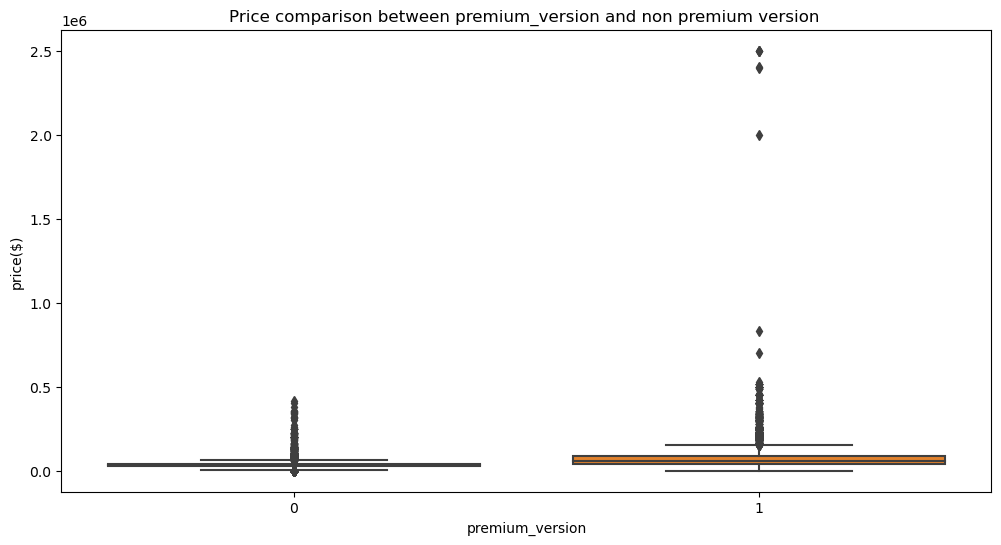

In [110]:
# compare between premium_version price / non premium_version price
plt.figure(figsize=(12, 6))
sns.boxplot(data=usedcars_df, x='premium_version' ,y='msrp')
plt.title("Price comparison between premium_version and non premium version ")
plt.xlabel('premium_version')
plt.ylabel('price($)')
plt.show()

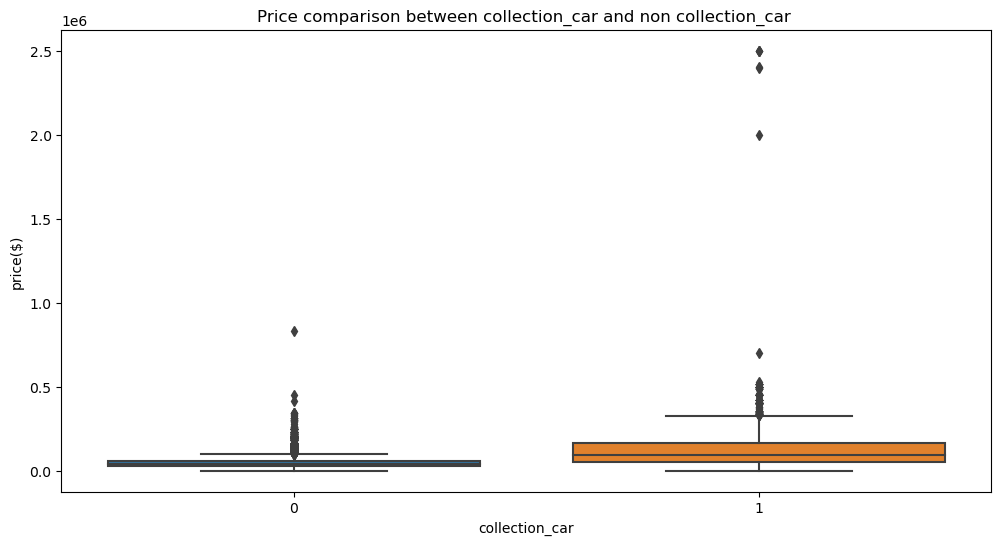

In [111]:
# price distribution with collection cars
plt.figure(figsize=(12, 6))
sns.boxplot(data=usedcars_df, x='collection_car' ,y='msrp')
plt.title("Price comparison between collection_car and non collection_car ")
plt.xlabel('collection_car')
plt.ylabel('price($)')
plt.show()

c:\myanaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


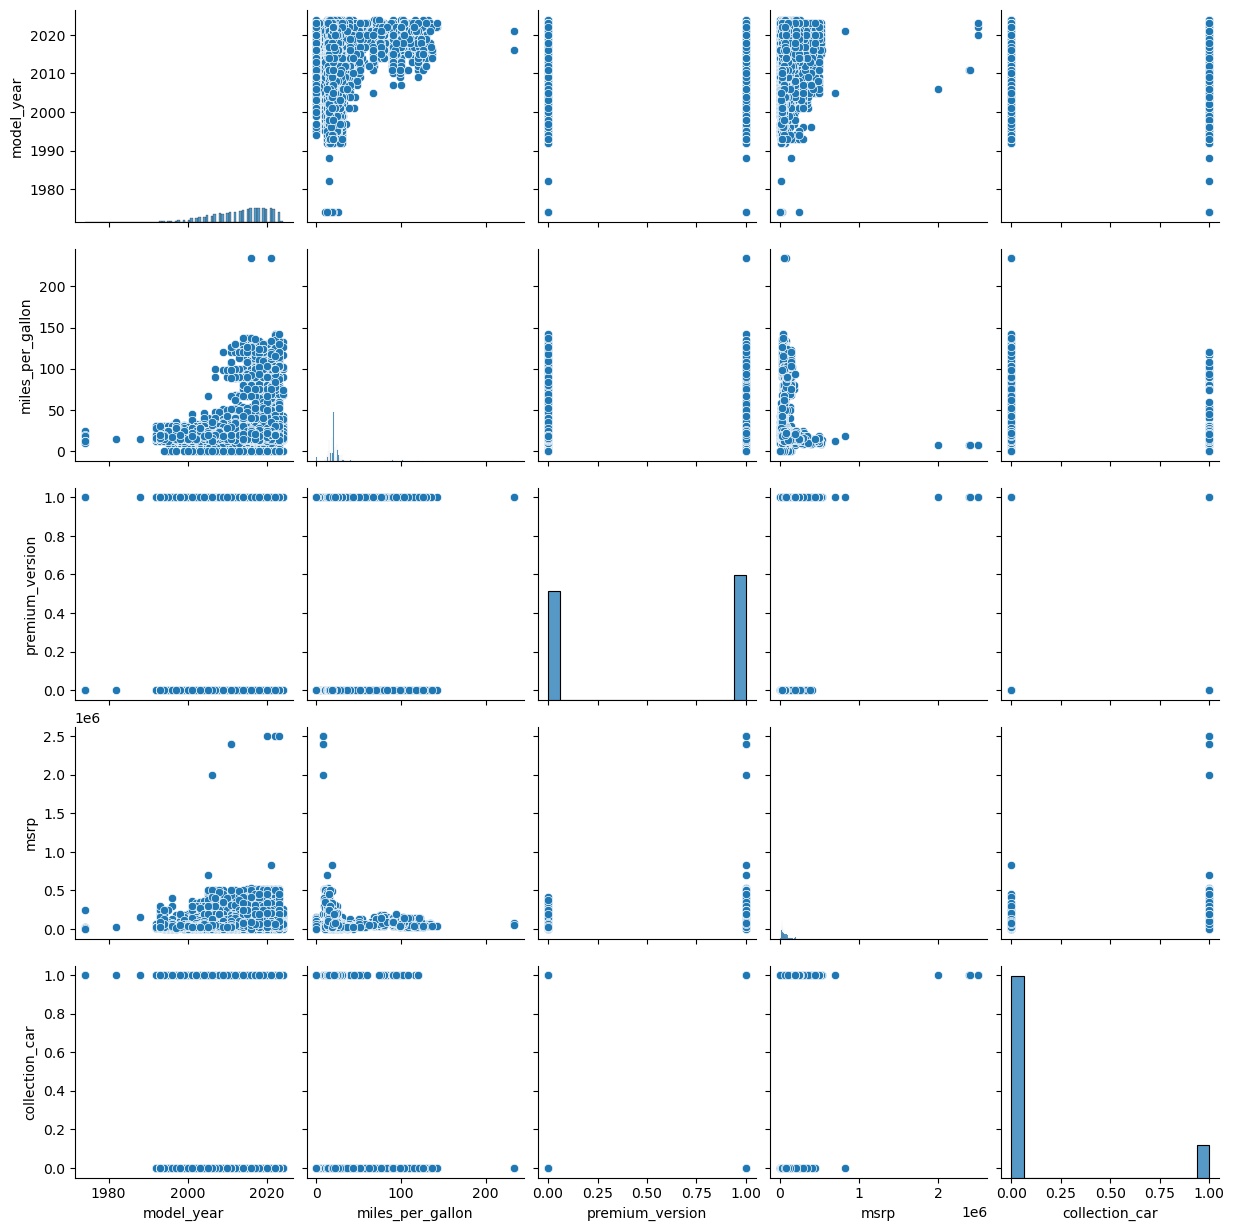

In [36]:
# Mutlivariante
sns.pairplot(usedcars_df)

## Final Insights and Summary

1- Price Trends Across Model Years: the newer model is higher price

2- Brand Influence on Pricing: the most average price is Bugatti brand 

3- Relationship Between Fuel Efficiency and Price: correlation between miles per gallon and price is very little , so the price is high if the efficiency is low , likely due to their premium features or larger sizes

4- Fuel Efficiency Across Car Types: Hachback type is the most efficient type so, economy and hybrid cars tend to be more fuel-efficient, while larger, luxury or sports cars have lower fuel efficiency.

5- the most version in used car is premuim version

6- Car Type Distribution: SUV is the most type in the used car

7- Impact of Premium Versions: price of premuim car is higher than non premuim car due to the added features or luxury status of the vehicle

8- Collection Cars as Unique Entities: price of collection car is higher than non collection car , often considered rare

9- Brand Representation: some brands like Toyota, Ford, and BMW having a much larger share. This suggests that the dataset may be skewed towards more popular brands.